# Cars_Price_Predictions

WorkFlow of the Project -> Pulling the data from SQL -> Loading the data in notebook -> Cleaning the data -> Performing EDA, Encoding, and scaling. -> Choosing an ML model -> Building the ML model -> Training and Testing the model -> Hyperparameter tuning -> Saving the model locally (pickle) -> Streamlit APP development -> Github integration and deployment.


In [1]:
#Installing MySQL library
!pip install pymysql

In [2]:
# Establishing a connection for MySQL
import pymysql
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

try:
    # Establish the connection
    conn = pymysql.connect(
        host = '127.0.0.1',
        user = 'root',
        password = 'Refolin@2293', # Give your own MySQL password here
        port = 3306
    )

    # Load data into DataFrame
    query = "SELECT * FROM cars.car_price_dataset"
    df = pd.read_sql(query, conn)

    # Display the results
    print('Connection successful. Here is your data :')
    display(df.head())

except pymysql.Error as e:
    print(f"MySQL Error : {e}")

finally:
    if 'conn' in locals():
        conn.close()
        print('Connection closed succesfully !!!')

Connection successful. Here is your data :


,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


Connection closed succesfully !!!


In [3]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import pickle

In [4]:
df.head(10) #Checking first 10 rows

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867
5,Toyota,Camry,2007,2.7,Petrol,Automatic,157889,4,4,7242
6,Honda,Civic,2010,3.4,Electric,Automatic,139584,3,1,11208
7,Kia,Sportage,2001,4.7,Electric,Semi-Automatic,157495,2,2,7950
8,Kia,Sportage,2014,2.6,Hybrid,Manual,98700,3,4,9926
9,Toyota,RAV4,2005,3.1,Petrol,Manual,107724,2,5,6545


In [5]:
print('Rows :',df.shape[0])
print('Columns :', df.shape[1])


Rows : 10000
Columns : 10


In [6]:
#Checking the info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


**Observations:**
* All the columns are in correct data type.

In [7]:
#Checking the null values
df.isnull().sum()

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64

In [10]:
df.Transmission.unique()

array(['Manual', 'Automatic', 'Semi-Automatic'], dtype=object)

In [9]:
df.Model.unique()

array(['Rio', 'Malibu', 'GLA', 'Q5', 'Golf', 'Camry', 'Civic', 'Sportage',
       'RAV4', '5 Series', 'CR-V', 'Elantra', 'Tiguan', 'Equinox',
       'Explorer', 'A3', '3 Series', 'Tucson', 'Passat', 'Impala',
       'Corolla', 'Optima', 'Fiesta', 'A4', 'Focus', 'E-Class', 'Sonata',
       'C-Class', 'X5', 'Accord'], dtype=object)

In [8]:
#df['Year'] = pd.to_datetime(df['Year'])

In [11]:
df.Engine_Size.unique()

array([4.2, 2. , 2.6, 2.7, 3.4, 4.7, 3.1, 1.3, 4.5, 4.8, 2.3, 2.4, 3.2,
       2.9, 1.5, 1.8, 4.6, 2.8, 3.9, 3.3, 1.9, 3.5, 1.4, 2.2, 1. , 1.2,
       4.9, 3.6, 3.8, 4. , 1.7, 1.6, 4.1, 1.1, 2.5, 3. , 5. , 2.1, 3.7,
       4.3, 4.4])

In [17]:
df.Brand.unique()

array(['Kia', 'Chevrolet', 'Mercedes', 'Audi', 'Volkswagen', 'Toyota',
       'Honda', 'BMW', 'Hyundai', 'Ford'], dtype=object)

In [9]:
df.dtypes

Brand            object
Model            object
Year              int64
Engine_Size     float64
Fuel_Type        object
Transmission     object
Mileage           int64
Doors             int64
Owner_Count       int64
Price             int64
dtype: object

**Observations:**
* There are no null values in the data.

In [10]:
#Checking for duplicate values
df.duplicated().sum()

0

**Observations:**
* There are no diplicate values.

# Exploratory Data Analysis

**Summary statistics**

In [11]:
#Checking the summary statistics
df.describe()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2011.543700,3.000560,149239.111800,3.497100,2.991100,8852.96440
std,6.897699,1.149324,86322.348957,1.110097,1.422682,3112.59681
min,2000.000000,1.000000,25.000000,2.000000,1.000000,2000.00000
25%,2006.000000,2.000000,74649.250000,3.000000,2.000000,6646.00000
50%,2012.000000,3.000000,149587.000000,3.000000,3.000000,8858.50000
75%,2017.000000,4.000000,223577.500000,4.000000,4.000000,11086.50000
max,2023.000000,5.000000,299947.000000,5.000000,5.000000,18301.00000


**Observations:**
* For all columns, mean is almost equal to median implying the distribution of the data is symmetric for all columns.

In [12]:
df.describe(include='object')

,Brand,Model,Fuel_Type,Transmission
count,10000,10000,10000,10000
unique,10,30,4,3
top,Ford,Accord,Electric,Manual
freq,1048,365,2625,3372


**Observations:**
* We can observe that Car from brand Ford and accord model which is electric and manual has the highest frequency.

In [13]:
df.groupby('Brand')['Price'].mean()

Brand
Audi          8929.373796
BMW           8704.068068
Chevrolet     9015.683948
Ford          8852.570611
Honda         8665.596630
Hyundai       8778.279397
Kia           8880.086066
Mercedes      8980.087049
Toyota        8798.184536
Volkswagen    8928.377451
Name: Price, dtype: float64

<AxesSubplot:xlabel='Brand', ylabel='count'>

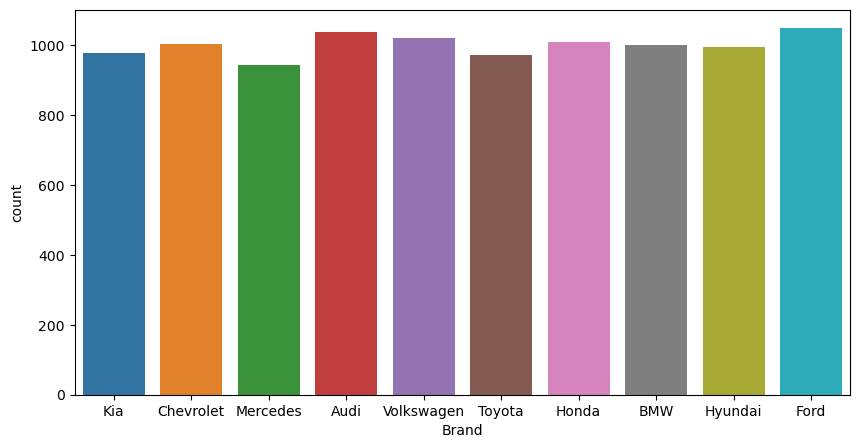

In [14]:
#Plotting the brands
plt.figure(figsize=(10,5))
sns.countplot(x='Brand',data=df)

**Observations:**

* We can observe that Ford is the highest and Mercedes is the lowest, but there is not much difference in the frequency of the brands.

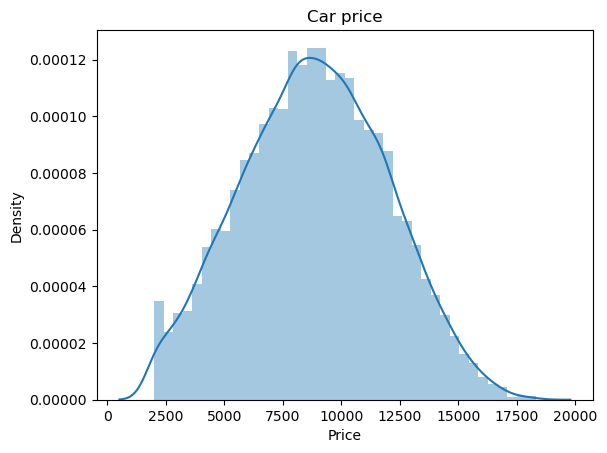

In [15]:
#Dist plot for price

sns.distplot(df['Price'])
plt.title('Car price')
plt.show()

**Observations:**
* we can observe that the Car price has almost normal distrubution.

In [16]:
# Checking top 5 brands in terms of price
cp=df[['Brand','Price']]

In [17]:
cp.sort_values(by='Price',ascending=False).head()

,Brand,Price
1100,Toyota,18301
7221,Audi,18255
1012,Ford,18017
9564,Honda,17906
5698,Honda,17899


**Observations:**
* These are the top five car brands with highest price.

In [18]:
# Checking fuel type
df.Fuel_Type.value_counts()

Electric    2625
Diesel      2512
Hybrid      2453
Petrol      2410
Name: Fuel_Type, dtype: int64

In [19]:
df.columns

Index(['Brand', 'Model', 'Year', 'Engine_Size', 'Fuel_Type', 'Transmission',
       'Mileage', 'Doors', 'Owner_Count', 'Price'],
      dtype='object')

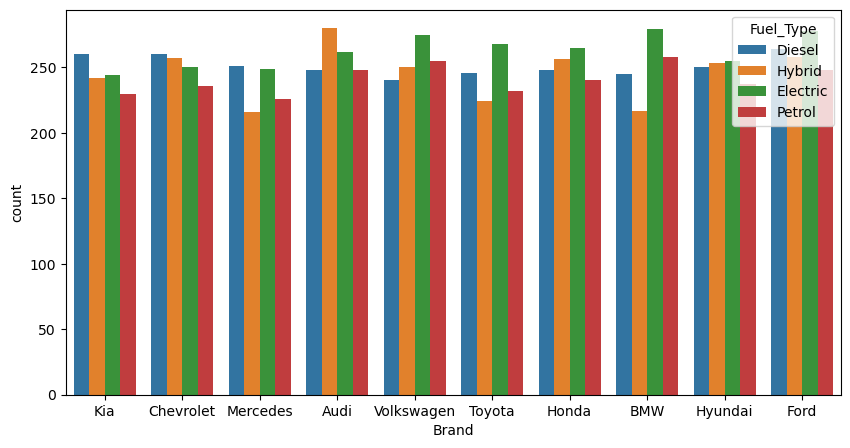

In [20]:
#Plot Brand and Fuel type
plt.figure(figsize=(10,5))
sns.countplot(x='Brand',hue='Fuel_Type', data=df)
plt.show()

**Observations:**
* We can observe that fuel type 'Petrol' is less in almost all car brands.
* Cars with Fuel type 'Hybrid' are highest in the brand Audi and 'Electric' is highest in BMW.

<AxesSubplot:xlabel='Mileage', ylabel='Price'>

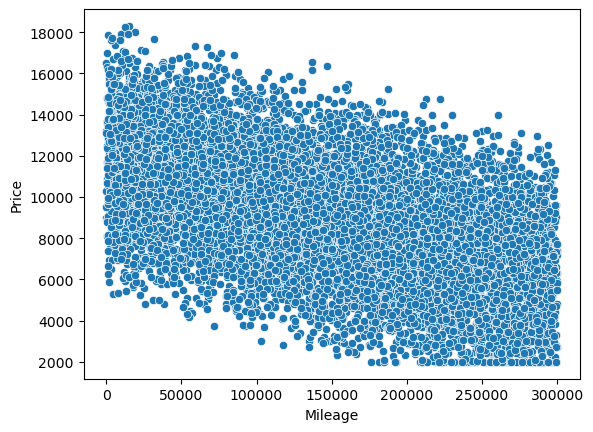

In [21]:
#Milage and Price
sns.scatterplot(x='Mileage', y='Price', data=df)

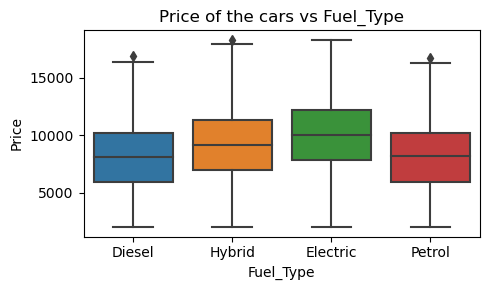

In [22]:
plt.figure(figsize=(5,3))
sns.boxplot(y='Price',x='Fuel_Type',data=df)
plt.title('Price of the cars vs Fuel_Type')
plt.tight_layout()
plt.show()


**Observations:**

* We can see that the car price for fuel type 'Electric' is highest.

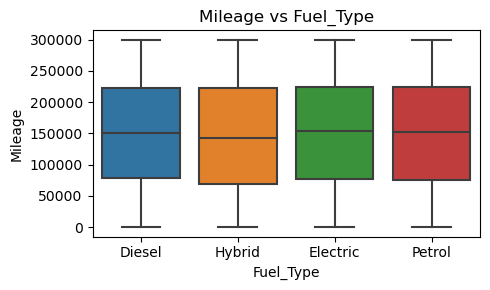

In [23]:
plt.figure(figsize=(5,3))
sns.boxplot(y='Mileage',x='Fuel_Type',data=df)
plt.title('Mileage vs Fuel_Type')
plt.tight_layout()
plt.show()

**Observations:**
* There is not much difference for mileage in different fuel types.

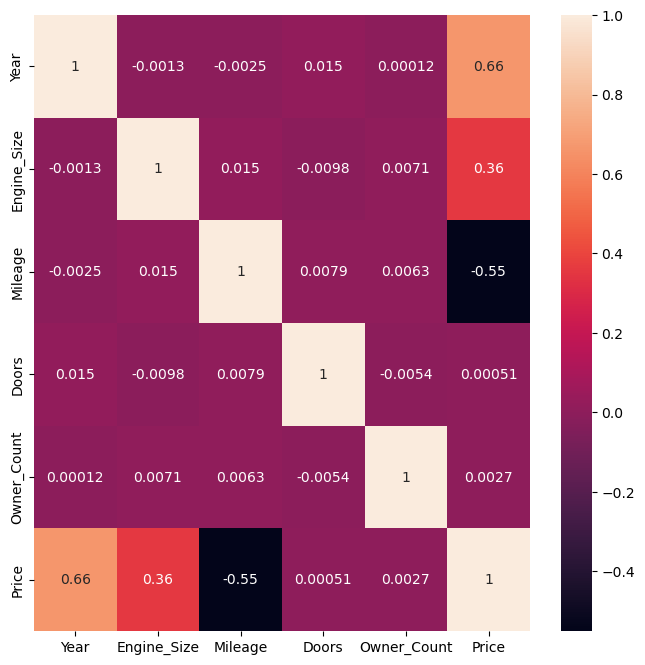

In [24]:
#Correlation
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

**Observations:**

* There is a positive correlation of Price with Year and Engine_size.

* There is a negative correlation between mileage and Price.


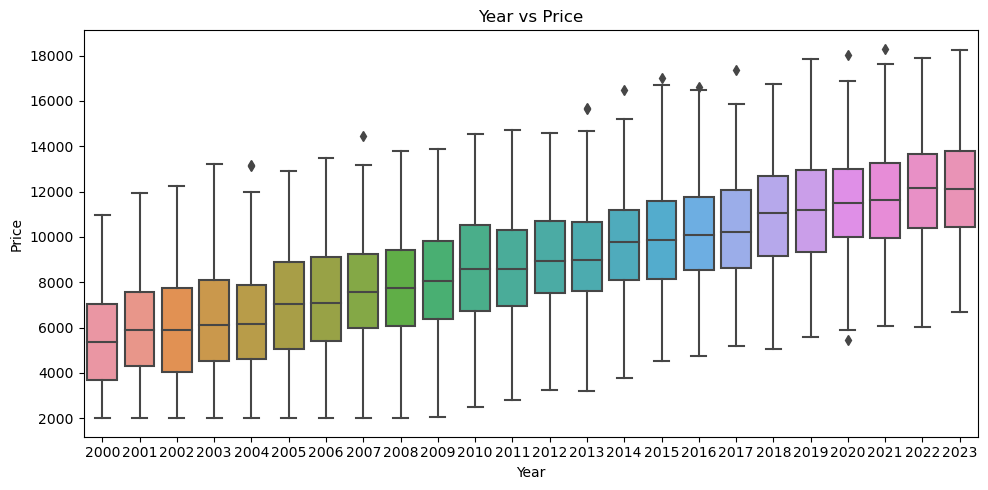

In [25]:
#Year vs Price
plt.figure(figsize=(10,5))
sns.boxplot(y='Price',x='Year',data=df)
plt.title('Year vs Price')
plt.tight_layout()
plt.show()

**Observations:**
* we can observe that older cars has less price and cars with latest year has higher prices. 

In [26]:
df1=df.copy()
df1.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


# Model Preprocessing


# Label Encoding

In [27]:
# Label Encoding on Categorical Column
label_encoders = {}
for column in df.select_dtypes(include = ['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [28]:
df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,6,24,2020,4.2,0,1,289944,3,5,8501
1,2,19,2012,2.0,2,0,5356,2,3,12092
2,7,16,2020,4.2,0,0,231440,4,2,11171
3,0,22,2023,2.0,1,1,160971,2,1,11780
4,9,17,2003,2.6,2,2,286618,3,3,2867


# Seperating the data into input and output features


In [29]:
X=df.drop('Price',axis=1)
y=df['Price']

In [30]:
X

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count
0,6,24,2020,4.2,0,1,289944,3,5
1,2,19,2012,2.0,2,0,5356,2,3
2,7,16,2020,4.2,0,0,231440,4,2
3,0,22,2023,2.0,1,1,160971,2,1
4,9,17,2003,2.6,2,2,286618,3,3
...,...,...,...,...,...,...,...,...,...
9995,6,20,2004,3.7,0,2,5794,2,4
9996,2,18,2002,1.4,1,0,168000,2,1
9997,1,0,2010,3.0,3,0,86664,5,1
9998,3,13,2002,1.4,2,0,225772,4,1


In [31]:
y

0        8501
1       12092
2       11171
3       11780
4        2867
        ...  
9995     8884
9996     6240
9997     9866
9998     4084
9999     3342
Name: Price, Length: 10000, dtype: int64

categorical_features_indices 

# Performing Feature scaling


In [32]:
from sklearn.preprocessing import StandardScaler
scaling      = StandardScaler()
scaled_input = scaling.fit_transform(X)

scaled_input

array([[ 0.53632337,  1.10749166,  1.2260209 , ...,  1.63007524,
        -0.44782119,  1.41212224],
       [-0.8522161 ,  0.52904621,  0.06615581, ..., -1.66689517,
        -1.34868861,  0.0062561 ],
       [ 0.88345824,  0.18197894,  1.2260209 , ...,  0.95230261,
         0.45304622, -0.69667696],
       ...,
       [-1.19935097, -1.6690465 , -0.22381047, ..., -0.72493672,
         1.35391364, -1.39961003],
       [-0.50508123, -0.16508833, -1.38367556, ...,  0.88663847,
         0.45304622, -1.39961003],
       [ 1.57772797,  1.45455893, -1.5286587 , ...,  0.10012842,
        -0.44782119,  0.0062561 ]])

# Splitting the data into training and testing data 

In [33]:
X_train,X_test,y_train,y_test=train_test_split(scaled_input,y,test_size=0.2,random_state=42)

In [34]:
X.shape,y.shape

((10000, 9), (10000,))

In [35]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 9), (2000, 9), (8000,), (2000,))

# Model Building 

# Loading the RandomForest

In [36]:
from sklearn.ensemble import RandomForestRegressor

# Creating the model
model = RandomForestRegressor(random_state = 5)

# Fitting the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=5)

In [37]:
# Taking predictions from the model
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

In [38]:
# Evaluating the model
print('Training RMSE :', np.round(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)), 3))
print('Training R2 Score :', np.round(metrics.r2_score(y_train, y_train_pred), 3))

print('\nTesting RMSE :', np.round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 3))
print('Testng R2 Score :', np.round(metrics.r2_score(y_test, y_pred), 3))

Training RMSE : 177.065
Training R2 Score : 0.997

Testing RMSE : 468.643
Testng R2 Score : 0.976


**Observations:**

* R2 Score of the model is good.
* RMSE is very high on testing data compare to training data, this implies model is Overfitting.

In [39]:
# Installing xgboost
!pip install xgboost

In [40]:
# Creating the XGBoost()
from xgboost import XGBRegressor
xgb = XGBRegressor(random_state = 5)

# Fitting the data
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=5, ...)

In [41]:
# Taking the predictions from the model
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

In [42]:
# Evaluating the model
print('Training RMSE :', np.round(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)), 3))
print('Training R2 Score :', np.round(metrics.r2_score(y_train, y_train_pred), 3))

print('\nTesting RMSE :', np.round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 3))
print('Testng R2 Score :', np.round(metrics.r2_score(y_test, y_pred), 3))

Training RMSE : 130.662
Training R2 Score : 0.998

Testing RMSE : 468.643
Testng R2 Score : 0.976


**Observations:**

* R2 Score of the model is good.
* RMSE is very high on testing data compare to training data, this implies model is Overfitting.

# Catboost Model

In [43]:
!pip install catboost

In [44]:
from catboost import CatBoostRegressor


In [45]:
# for catboost algorithm label encoder and feature scaling is not required,
#Hence using the copy of the data before LE and FS 

X=df1.drop('Price',axis=1) 
# for catboost algorithm label encoder and feature scaling 
y=df1['Price']

In [46]:
# Identify categorical features (CatBoost handles these directly by index or name)
categorical_features_indices = [X.columns.get_loc(col) for col in X.columns if X[col].dtype == 'object']
# Alternatively, you can provide a list of column names:
# categorical_features_names = ['Brand', 'Model', 'Fuel_Type', 'Transmission', 'Doors']


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Initialize and train the CatBoostRegressor model
cat = CatBoostRegressor(
    iterations=1000,  # Number of boosting iterations (trees)
    learning_rate=0.01, 
    verbose = 100,
    cat_features=categorical_features_indices
)

#Fitting the model

cat.fit(X_train, y_train)


0:	learn: 3107.6758005	total: 201ms	remaining: 3m 20s
100:	learn: 1492.1360689	total: 8.78s	remaining: 1m 18s
200:	learn: 779.0043788	total: 17.2s	remaining: 1m 8s
300:	learn: 451.7227424	total: 25.7s	remaining: 59.8s
400:	learn: 299.1120636	total: 34.2s	remaining: 51.1s
500:	learn: 229.9602058	total: 42.6s	remaining: 42.4s
600:	learn: 197.9898799	total: 51s	remaining: 33.9s
700:	learn: 180.0403507	total: 59.5s	remaining: 25.4s
800:	learn: 167.1199761	total: 1m 7s	remaining: 16.8s
900:	learn: 158.4643852	total: 1m 15s	remaining: 8.35s
999:	learn: 152.4967578	total: 1m 23s	remaining: 0us


In [47]:
# Taking predictions from the model
y_pred = cat.predict(X_test)
y_train_pred = cat.predict(X_train)

In [48]:
# Evaluating the model
print('Training RMSE :', np.round(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)), 3))
print('Training R2 Score :', np.round(metrics.r2_score(y_train, y_train_pred), 3))

print('\nTesting RMSE :', np.round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 3))
print('Testng R2 Score :', np.round(metrics.r2_score(y_test, y_pred), 3))

Training RMSE : 73.382
Training R2 Score : 0.999

Testing RMSE : 76.411
Testng R2 Score : 0.999


**Observations:**

* R2 score is perfect.
* RMSE of the model is also decreased.
* Overall performance of the model is good.

**Catboost model fits perfectly**

# Saving the model



In [50]:
# Save the model (CatBoostRegressor())
with open('catboost_regressor.pkl', 'wb') as file:
    pickle.dump(cat, file)